In [165]:
%pylab inline
import os
import pandas as pd
import numpy as np
import nltk
import gensim
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import re
import string

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [76]:
df = pd.read_csv("..\out_final_gg.csv")

In [166]:
df = pd.read_excel("..\merged_location_file_v2.xlsx")

In [69]:
df = pd.read_csv("..\dhruv_email_text_final-csv_11262017_1730.csv")

In [167]:
df.head()

,Column,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,location
0,378,Jann Gobble,2017-10-09 00:00:00,68,38.0,@SPaulsonKTVU #SonomaFire Havenâ€™t see yaâ€™l...,"33.814369,-117.917800",0,#SonomaFire #SantaRosa,9.173814e+17,NaN,"33.814369,-117.917800"
1,353,Amanda Baller,2017-10-12 00:00:00,0,0.0,The loss of lives from this fire is unreal to ...,Btwn Water Works & Baltic Ave,0,#CaliforniaWildfires,9.185584e+17,NaN,Btwn Water Works & Baltic Ave
2,353,Amanda Baller,2017-10-12 00:00:00,0,0.0,The loss of lives from this fire is unreal to ...,Btwn Water Works & Baltic Ave,0,#CaliforniaWildfires,9.185584e+17,NaN,Btwn Water Works & Baltic Ave
3,491,Natasha Marie Llenas,2017-11-02 00:00:00,0,0.0,Counting Crows Set to Headline 'For The Love o...,Domingos 5:00-8pm Exa 96.9,0,#djmissgem,9.261332e+17,NaN,Domingos 5:00-8pm Exa 96.9
4,682,Sugarloaf Ridge Park,2017-10-10 00:00:00,0,1.0,Some video from Adobe Canyon last night. Our N...,"Kenwood, CA",0,#sonomafire,9.175767e+17,NaN,"Kenwood, CA"


In [168]:
df['own_id'] = pd.Series(range(0,df.shape[0]))

In [169]:
df.own_id

0            0
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19
20          20
21          21
22          22
23          23
24          24
25          25
26          26
27          27
28          28
29          29
         ...  
47435    47435
47436    47436
47437    47437
47438    47438
47439    47439
47440    47440
47441    47441
47442    47442
47443    47443
47444    47444
47445    47445
47446    47446
47447    47447
47448    47448
47449    47449
47450    47450
47451    47451
47452    47452
47453    47453
47454    47454
47455    47455
47456    47456
47457    47457
47458    47458
47459    47459
47460    47460
47461    47461
47462    47462
47463    47463
47464    47464
Name: own_id, dtype: int32

In [170]:
print(df.shape)
print(df.columns.values)

(47465, 13)
['Column' 'username' 'date' 'retweets' 'favorites' 'text' 'geo' 'mentions'
 'hashtags' 'id' 'permalink' 'location' 'own_id']


In [171]:
def clean_tweets(t_list):
    cleaned_tweets = []
    #initialize tweet tokenizer
    twe_tokenier = TweetTokenizer()
    i = 0
    for tw in t_list:
        #remove starting with http
        try:
            result = re.sub(r"http\S+", "", tw)
        except:
            print(i)
        #remove hashtag
        ht = re.findall('#\S+',result)
        for h in ht:
            result = result.replace(h,'')
            
        #remove remaining punctation
        remove_punct = re.compile('[%s]' % re.escape(string.punctuation))
        
        result = remove_punct.sub('',result)
        
        #convert to lower
        result = result.lower()
        
        cleaned_tweets.append(result)
        i = i+1
    
    return cleaned_tweets
        

In [13]:
twe_list = (df.ix[:,'text']).tolist()
cleaned_t_list = clean_tweets(twe_list)

41565
41646
41806
41847
41848
41849
41850
41851
41852
41853
41854
41855
41856
41857
41858
41859
41860
41861
41862
41863
41864
41865
41866
41867
41868
41869
41870
41871
41872
41873
41874
41875
41876
41877
41878
41879
41880
41881
41882
41883
41884
41885
41886
41887
41888
41889
41890
41891
41892
41893
41894
41895
41896
41897
41898
41899
41900
41901
41902
41903
41942
42061
42065
42066
42067
42068
42069
42070
42071
42072
42073
42074
42075
42076
42077
42078
42079
42080
42081
42082
42083
42084
42085
42086
42087
42088
42089
42090
42091
42092
42093
42094
42095
42096
42097
42098
42099
42100
42101
42102
42103
42104
42105
42106
42107
42108
42109
42110
42111
42112
42113
42114
42115
42116
42117
42118
42119
42120
42121
42122
42123
42124
42125
42126
42127
42128
42129
42130
42131
42132
42133
42134
42135
42136
42137
42138
42139
42140
42141
42142
42143
42144
42145
42146
42147
42148
42149
42150
42151
42152
42153
42154
42155
42156
42157
42158
42159
42160
42161
42162
42163
42164
42165
42166
42167
42168
4216

In [14]:
cleaned_t_list

['everyone please say a prayer for my sister her husband and my niece as they are in california  surrounded by wildfire  with no way out',
 'realdonaldtrump there is a massive wildfire tearing apart california  oh and americans are still struggling in pryou fool pictwittercomwch2udkjxv',
 'a dog survived a california wildfire and i cant even survive a weekend out in portsmouth you win some you lose some',
 'the air pollution in california now is by as worst as china air pollution due to the wildfire ',
 'â€¢ vf home of peanuts creator charles schulz destroyed in california wildfire  much ofâ€¦  googlfbtpvy4h',
 'ooooo i see yall big mad about those unc findings enough tears to put out a california wildfire  my goodness',
 'get 50 off the forever cold water bottle net proceeds go to california wildfire relief 16  promotionskinjacomget50offthe forevercoldwaterbottlenetproceeds1819853705utmmediumsharefromsiteutmsourcepromotionstwitter â€¦',
 'at first youre like awww but then its fuck  co

In [55]:
"""from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df['stemmed'] = df.text.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))
df.stemmed.head()"""

'from nltk.stem.snowball import SnowballStemmer\nstemmer = SnowballStemmer("english")\ndf[\'stemmed\'] = df.text.map(lambda x: \' \'.join([stemmer.stem(y) for y in x.split(\' \')]))\ndf.stemmed.head()'

In [15]:
# Starting with the CountVectorizer/TfidfTransformer approach...
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer(stop_words='english', min_df=.0025, max_df=.1, ngram_range=(1,2))
cvec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.1, max_features=None, min_df=0.0025,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [58]:
"""from itertools import islice
cvec.fit(df.stemmed)
list(islice(cvec.vocabulary_.items(), 20))"""

'from itertools import islice\ncvec.fit(df.stemmed)\nlist(islice(cvec.vocabulary_.items(), 20))'

In [82]:
#len(cvec.vocabulary_)

AttributeError: 'CountVectorizer' object has no attribute 'vocabulary_'

In [56]:
"""i = 0
for tw in cleaned_t_list:
    bg = nltk.bigrams(tw.split())
    for ite in bg:
        print(ite)
    i = i+1
    if i>5:
        break"""

'i = 0\nfor tw in cleaned_t_list:\n    bg = nltk.bigrams(tw.split())\n    for ite in bg:\n        print(ite)\n    i = i+1\n    if i>5:\n        break'

In [303]:
my_additional_stop_words = ['napa','sonoma','bay','area','san','valley','california','fires','rosa','wildfire','southern'
                            ,'northern','deadly','air','quality','death','amp','&amp','just']
from sklearn.feature_extraction import text 

my_stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
print(my_stop_words)

frozenset({'alone', 'empty', 'ten', 'who', 'do', 'nine', 'herself', 'if', 'either', 'couldnt', 'find', 'amongst', 'in', 'less', 'already', 'becomes', 'part', 'than', 'formerly', 'twelve', 'forty', 'onto', 'deadly', 'until', 'cry', 'might', 'often', 'done', 'valley', 'hundred', 'very', 'six', 'whereupon', 'off', 'under', 'they', 'out', 'no', 'anything', 'least', 'few', 'the', 'whole', 'wherein', 'name', 'whither', 'together', 'you', 'cant', 'himself', 'whether', 'own', 'afterwards', 'eleven', 'its', 'again', 'about', 'it', 'thence', 'hereby', 'rather', 'fifteen', 'several', 'along', 'how', 'ours', 'napa', 'etc', 'first', 'that', 'thick', 'seemed', 'wherever', 'four', 'well', 'three', 'amount', 'go', 'almost', 'much', 'hereafter', 'top', 'whose', 'yet', 'two', 'but', 'myself', 'seems', 'otherwise', 'am', 'yourselves', 'put', 'after', 'many', 'above', 'so', 'fire', 'neither', 'thin', 'beyond', 'twenty', 'former', 'up', 'amoungst', 'as', 'become', 'anyway', 'nothing', 'bill', 'has', 'among

In [34]:
# Starting with the CountVectorizer/TfidfTransformer approach...
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer(stop_words=my_stop_words, min_df=.0025, max_df=.1, ngram_range=(2,2))
cvec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.1, max_features=None, min_df=0.0025,
        ngram_range=(2, 2), preprocessor=None,
        stop_words=frozenset({'besides', 'had', 'however', 'herein', 'the', 'each', 'ie', 'her', 'becomes', 'nothing', 'again', 'yourselves', 'amongst', 'through', 'ever', 'never', 'too', 'on', 'enough', 'napa', 'whereupon', 'one', 'will', 'ours', 'up', 'have', 'fire', 'thick', 'not', 'beforehand', 'yoursel...'everyone', 'only', 'six', 'find', 'whither', 'latter', 'this', 'a', 'last', 're', 'same', 'noone'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [35]:
cvec.fit(cleaned_t_list)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.1, max_features=None, min_df=0.0025,
        ngram_range=(2, 2), preprocessor=None,
        stop_words=frozenset({'besides', 'had', 'however', 'herein', 'the', 'each', 'ie', 'her', 'becomes', 'nothing', 'again', 'yourselves', 'amongst', 'through', 'ever', 'never', 'too', 'on', 'enough', 'napa', 'whereupon', 'one', 'will', 'ours', 'up', 'have', 'fire', 'thick', 'not', 'beforehand', 'yoursel...'everyone', 'only', 'six', 'find', 'whither', 'latter', 'this', 'a', 'last', 're', 'same', 'noone'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [36]:
from itertools import islice
cvec.fit(cleaned_t_list)
list(islice(cvec.vocabulary_.items(), 20))

[('destroys property', 45),
 ('latest toll', 99),
 ('dailypostfeedcomillegalmuslim fromiranarrestedforstartingcaliforniawildfire',
  38),
 ('evacuees just', 62),
 ('hour hour', 85),
 ('think event', 144),
 ('breaking illegal', 18),
 ('thoughts amp', 145),
 ('deadliest state', 41),
 ('footage shows', 72),
 ('return wasteland', 125),
 ('stay safe', 136),
 ('insurance commissioner', 92),
 ('crews search', 37),
 ('shows extent', 132),
 ('toll climbs', 148),
 ('reveal shocking', 126),
 ('shocking damage', 130),
 ('dog alive', 52),
 ('girl dies', 74)]

In [37]:
cvec_counts = cvec.transform(cleaned_t_list)
print ('sparse matrix shape:', cvec_counts.shape)
print( 'nonzero count:', cvec_counts.nnz)
print ('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (45165, 162)
nonzero count: 34386
sparsity: 0.47%


In [38]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

,occurrences,term
151,661,toll rises
160,556,wine country
36,478,creator charles
154,456,video shows
79,450,help victims
72,443,footage shows
115,441,peanuts creator
29,426,cinesi isnt
28,426,che lavorano
25,426,certo che


In [39]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<45165x162 sparse matrix of type '<class 'numpy.float64'>'
	with 34386 stored elements in Compressed Sparse Row format>

In [40]:
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
151,toll rises,0.013941
160,wine country,0.012063
79,help victims,0.009894
154,video shows,0.007425
72,footage shows,0.006307
136,stay safe,0.006139
112,numb horror,0.005425
7,75 years,0.005074
123,relief efforts,0.004931
36,creator charles,0.004682


In [45]:
[x for x in weights_df.term]

['100 98',
 '11 state',
 '2017 cdt',
 '24 merge',
 '33 billion',
 '70pound dog',
 '74 billion',
 '75 years',
 'abc news',
 'allowed home',
 'amp prayers',
 'arrested starting',
 'asks 74',
 'awaits victims',
 'bike 70pound',
 'billion rebuilding',
 'blast kills',
 'body cam',
 'breaking illegal',
 'bufale cinesi',
 'burn injuries',
 'burning inside',
 'burning near',
 'burns home',
 'cam footage',
 'certo che',
 'charles schulz',
 'charles schulzs',
 'che lavorano',
 'cinesi isnt',
 'claims 33',
 'climate change',
 'climbs 24',
 'commissioner says',
 'couple killed',
 'couple married',
 'creator charles',
 'crews search',
 'dailypostfeedcomillegalmuslim fromiranarrestedforstartingcaliforniawildfire',
 'damage space',
 'damaged quickly',
 'deadliest state',
 'deputy driving',
 'destroyed homes',
 'destroys home',
 'destroys property',
 'destructive spread',
 'devastating photos',
 'dies burn',
 'disaster evacuees',
 'discovers dog',
 'discovers hollowed',
 'dog alive',
 'dog duffel',
 '

In [4]:
helpers = ['want home','support victims','stay safe','search bodies','reported missing','relief efforts','just want','help victims'
          ,'evacuees allowed',
 'evacuees just',
 'evacuees return',
      'crews search', 'billion rebuilding',  'awaits victims',
         'allowed home' ]

In [48]:
len(helpers)

15

In [65]:
(df.text[0]).contains(helpers[0])

AttributeError: 'str' object has no attribute 'contains'

In [119]:
df_cle = df
#df_cle['cleaned_t'] = list(map(lambda x: clean_tweets(x), df.text))
df_cle.columns

Index(['Column', 'username', 'date', 'retweets', 'favorites', 'text', 'geo',
       'mentions', 'hashtags', 'id', 'permalink', 'location', 'Unnamed: 12',
       'cleaned_t', 'is_helper', 'helper_class'],
      dtype='object')

In [83]:
df_cle = df
rows = df_cle.shape[0]
df_cle['is_helper'] = 0
df_cle['helper_class'] = 0
for i in range(rows):
    tweet = df_cle.ix[i,'text']
    try:
        tweet = tweet.lower()
    except:
        df_cle.ix[i,'is_helper'] = -1
        continue
    help_idx = 0
    for h in helpers:
        if (tweet.find(h) != -1):
            df_cle.ix[i,'is_helper'] = 1
            df_cle.ix[i,'helper_class'] = help_idx + 1
            help_idx = help_idx +1
    i = i+1

In [88]:
df_afteridf = df_cle[df_cle.is_helper != -1]#.sum()


## Before bigram tf-idf ::: Bruteforce classification 

In [294]:
helpers_uni = ['assist','aid','support','help','benefit','volunteer','evacuee','evacuees','search','stay','want','avail','relief'
              ,'reach','awaits','allowed','food','water','phone','text','fund','donate','money','funds','shelter']

In [174]:
count = 0
df_cle_uni = df
rows = df_cle_uni.shape[0]
df_cle_uni['is_helper'] = 0
df_cle_uni['helper_class'] = 0
for i in range(rows):
    tweet = df_cle_uni.ix[i,'text']
    try:
        tweet = tweet.lower()
    except:
        df_cle_uni.ix[i,'is_helper'] = -1
        continue
    help_idx = 0
    for h in helpers_uni:
        if (tweet.find(h) != -1):
            df_cle_uni.ix[i,'is_helper'] = 1
            df_cle_uni.ix[i,'helper_class'] = h
            count = count +1 
        #help_idx = help_idx +1
    #i = i+1

In [175]:
df_cle_uni_bf = df_cle_uni[df_cle_uni.is_helper != -1]

In [176]:
print(df_cle_uni_bf.shape)
df_cle_uni_bf.is_helper.sum()

(45884, 15)


9426

In [178]:
writer = pd.ExcelWriter('output_helper_uni.xlsx')
df_cle_uni_bf.to_excel(writer,'Sheet1')
writer.save()

In [179]:
df_cle_uni_bf.groupby(['is_helper']).count()

,Column,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,location,own_id,helper_class
is_helper,,,,,,,,,,,,,,
0,36458,15387,36458,36458,36458,36458,12420,18462,18829,36445,21071,26026,36458,36458
1,9426,4081,9426,9426,9426,9426,3332,5017,5027,9425,5345,6966,9426,9426


In [153]:
df_cle_uni_bf.groupby(['helper_class']).count()

,Column,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,location,is_helper
helper_class,,,,,,,,,,,,,
0,36458,15387,36458,36458,36458,36458,12420,18462,18829,36445,21071,26026,36458
aid,360,156,360,360,360,360,124,182,189,360,204,248,360
allowed,195,18,195,195,195,195,16,28,48,195,177,125,195
assist,100,78,100,100,100,100,63,82,85,100,22,72,100
avail,63,45,63,63,63,63,38,54,49,63,18,50,63
awaits,211,1,211,211,211,211,1,16,35,211,210,140,211
benefit,102,32,102,102,102,102,30,40,35,102,70,91,102
donate,607,277,607,607,607,607,226,374,318,607,330,442,607
evacuee,19,14,19,19,19,19,14,14,13,19,5,18,19


In [110]:
helpers_uni.index('search')

8

In [114]:
df_cle_uni.columns

Index(['Column', 'username', 'date', 'retweets', 'favorites', 'text', 'geo',
       'mentions', 'hashtags', 'id', 'permalink', 'location', 'Unnamed: 12',
       'cleaned_t', 'is_helper', 'helper_class'],
      dtype='object')

In [ ]:
count = 0
df_cle_uni_bf_cleaned_t = df_cle_uni_bf
rows = df_cle_uni_bf_cleaned_t.shape[0]
df_cle_uni_bf_cleaned_t['cleaned_tweet'] = 0
#df_cle_uni_bf_cleaned_t['helper_class'] = 0
for i in range(rows):
    tweet = df_cle_uni_bf_cleaned_t.ix[i,'text']
    try:
        tweet = clean_tweets(tweet)
    except:
        df_cle_uni_bf_cleaned_t.ix[i,'cleaned_tweet'] = "Uncleaned"
        count = count +1
        continue
    df_cle_uni_bf_cleaned_t.ix[i,'cleaned_tweet'] = tweet[0]
    #help_idx = 0
    '''for h in helpers_uni:
        if (tweet.find(h) != -1):
            df_cle_uni.ix[i,'is_helper'] = 1
            df_cle_uni.ix[i,'helper_class'] = h
            count = count +1 
        #help_idx = help_idx +1'''
    if i%1000 == 0:
        print("%d cleaned tweets" % i)
    #i = i+1


C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Miniconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0 cleaned tweets
1000 cleaned tweets
2000 cleaned tweets
3000 cleaned tweets
4000 cleaned tweets


In [49]:
clean_tweets(df_cle_uni_bf.text.tolist()[0])

['e',
 'v',
 'e',
 'r',
 'y',
 'o',
 'n',
 'e',
 ' ',
 'p',
 'l',
 'e',
 'a',
 's',
 'e',
 ' ',
 's',
 'a',
 'y',
 ' ',
 'a',
 ' ',
 'p',
 'r',
 'a',
 'y',
 'e',
 'r',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'm',
 'y',
 ' ',
 's',
 'i',
 's',
 't',
 'e',
 'r',
 '',
 ' ',
 'h',
 'e',
 'r',
 ' ',
 'h',
 'u',
 's',
 'b',
 'a',
 'n',
 'd',
 '',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'm',
 'y',
 ' ',
 'n',
 'i',
 'e',
 'c',
 'e',
 ' ',
 'a',
 's',
 ' ',
 't',
 'h',
 'e',
 'y',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 'c',
 'a',
 'l',
 'i',
 'f',
 'o',
 'r',
 'n',
 'i',
 'a',
 ' ',
 '',
 ' ',
 's',
 'u',
 'r',
 'r',
 'o',
 'u',
 'n',
 'd',
 'e',
 'd',
 ' ',
 'b',
 'y',
 ' ',
 'w',
 'i',
 'l',
 'd',
 'f',
 'i',
 'r',
 'e',
 ' ',
 '',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'n',
 'o',
 ' ',
 'w',
 'a',
 'y',
 ' ',
 'o',
 'u',
 't',
 '']

In [40]:
?isinstance

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1,stop_words=my_stop_words)
X = vectorizer.fit_transform(df_cle_uni_bf.text)

from sklearn.feature_selection import chi2

# compute chi2 for each feature - test how closely each feature is correlated with it's class
chi2score = chi2(X, df_cle_uni_bf.is_helper)[0]

'''import matplotlib.pyplot as plt

plt.figure(figsize=(16,30))
wscores = zip(vectorizer.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = zip(*wchi2[-100:])
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2, color='g')
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8, color='g')
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')'''

"import matplotlib.pyplot as plt\n\nplt.figure(figsize=(16,30))\nwscores = zip(vectorizer.get_feature_names(), chi2score)\nwchi2 = sorted(wscores, key=lambda x:x[1])\ntopchi2 = zip(*wchi2[-100:])\nx = range(len(topchi2[1]))\nlabels = topchi2[0]\nplt.barh(x,topchi2[1], align='center', alpha=0.2, color='g')\nplt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8, color='g')\nplt.yticks(x, labels)\nplt.xlabel('$\\chi^2$')"

In [83]:
print(len(chi2score))
print(len(vectorizer.get_feature_names()))

61678
61678


In [145]:
ws = zip(vectorizer.get_feature_names(), chi2score)
wch = sorted(ws, key=lambda x:x[1])

In [154]:
topchi2 = zip(*wchi2[-30:])

In [98]:
list(topchi2)

[]

In [155]:
test2 = list(topchi2)
zipped_list = test2[:]
zipped_list_2 = list(test2)


In [156]:
words_to_plt = zipped_list[0]
scores_to_plt = zipped_list[1]

In [157]:
scores_to_plt =(list(scores_to_plt))
words_to_plt = (list(words_to_plt))

In [158]:
(pd.Series(scores_to_plt)).min()
(pd.Series(scores_to_plt)).max()

1560.2638758244561

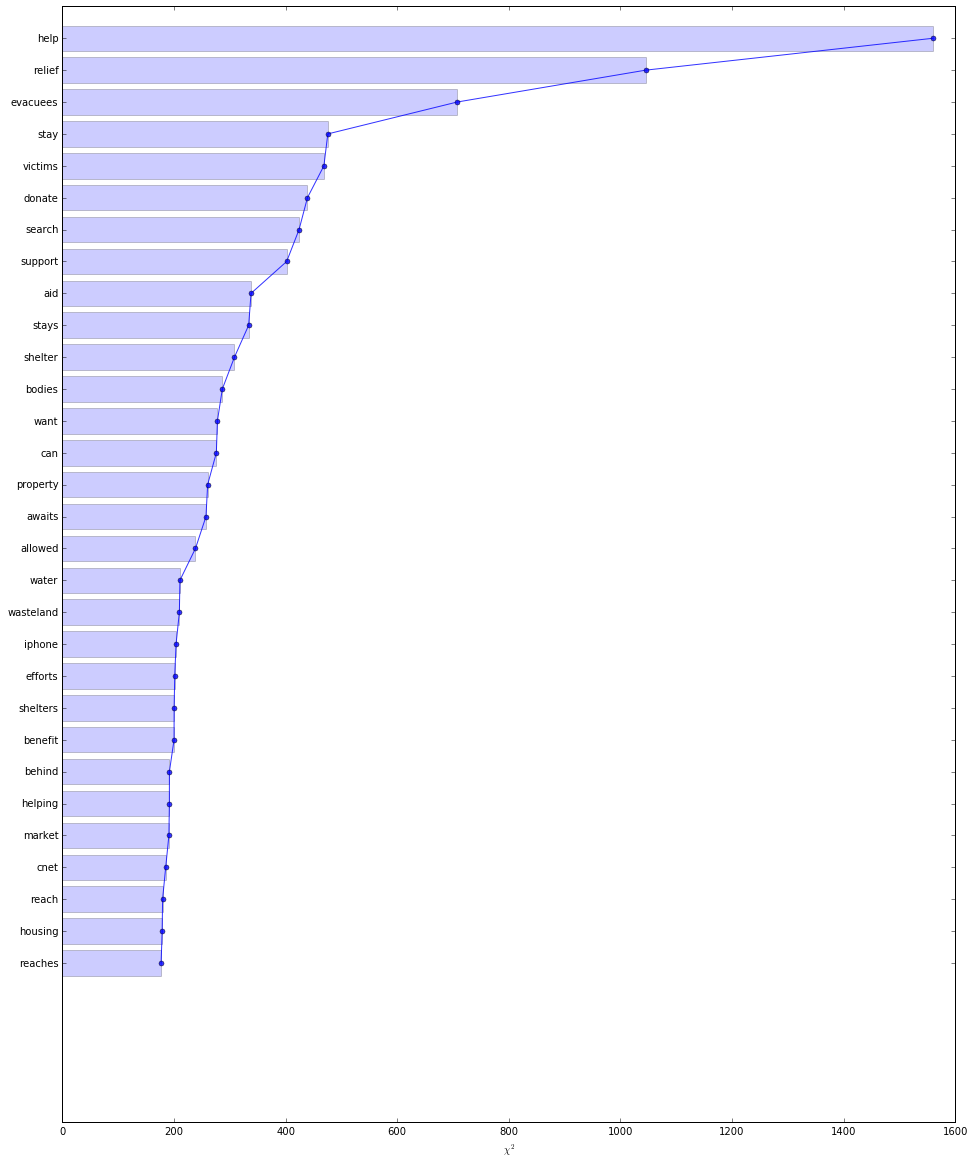

In [164]:
#x = range(len((next(topchi2))[1]))
#x = range(int((pd.Series(scores_to_plt)).min()),int((pd.Series(scores_to_plt)).max()))
plt.figure(figsize=(16,20))
x = range(len(scores_to_plt))
labels = words_to_plt
plt.barh(x,scores_to_plt, align='center', alpha=0.2, color='b')
plt.plot(scores_to_plt, x, '-o', markersize=5, alpha=0.8, color='b')
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.savefig('chisq.png')

<Container object of 100 artists>

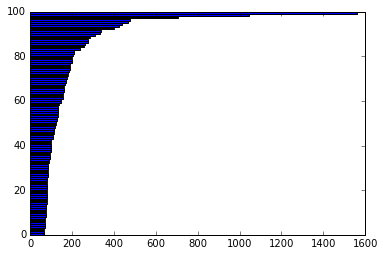

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.barh(range(len(scores_to_plt)),scores_to_plt)

In [327]:
sorted(scores_to_plt,reverse=True)

[1560.2638758244561,
 1045.2823863470976,
 707.33424664614654,
 475.56656200359038,
 468.54434231798302,
 439.06242279783078,
 424.02483831565604,
 401.84054577690148,
 337.95563921247788,
 333.71487617144163,
 308.28489510079737,
 286.52275128096358,
 277.71407876968374,
 275.81059726226101,
 260.20138510992984,
 257.20683650710737,
 238.39883681899801,
 210.51222759053411,
 209.54975625209158,
 203.60600118911714,
 201.19224768704103,
 200.14560230146537,
 200.01625744535318,
 191.67375749767481,
 191.63534466994059,
 190.78045895869369,
 185.02658444440496,
 179.47145576587721,
 178.70055235162829,
 176.79581514535781]

In [182]:
locs = df_cle_uni_bf[df_cle_uni_bf.is_helper == 1].location.unique()

In [184]:
for l in locs:
    print(l)

 Domingos 5:00-8pm Exa 96.9 
{'type': 'Point', 'coordinates': [36.61, -118.1]}
{'type': 'Point', 'coordinates': [37.77626, -122.42649]}
{'type': 'Point', 'coordinates': [37.805851, -122.4245911]}
{'type': 'Point', 'coordinates': [37.9818, -122.56611]}
{'type': 'Point', 'coordinates': [38.3048, -122.299]}
{'type': 'Point', 'coordinates': [38.347222, -122.518611]}
{'type': 'Point', 'coordinates': [38.3543499, -122.27569]}
{'type': 'Point', 'coordinates': [38.39675371, -122.36437739]}
{'type': 'Point', 'coordinates': [38.50611, -122.99083]}
{'type': 'Point', 'coordinates': [38.54724, -121.72553]}
1266 Broadway

El Cajon, CA 92021
271 Amsterdam Avenue
300 S. Pierce Street, Suite 201
El Cajon, CA 92020
37.983111,-122.02423
37Â°47'N 122Â°26'W (formerly NZ)
38,000 Providers
40.699367,-73.755914
41.139801,-96.025358
517-962-6033
5200 Soquel Ave Santa Cruz, CA
5565 Grossmont Center Drive Building 3, Suite 253
La Mesa CA 91942
707
7th Planet, Star System Sol
916 to 209 
94521
94941
9starsproduct

In [205]:
helpers_df = df_cle_uni_bf[df_cle_uni_bf.is_helper == 1]

In [206]:
type(helpers_df)

pandas.core.frame.DataFrame

In [209]:
helpers_df['retweet_num'] = helpers_df.retweets.astype('int')

C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [224]:
helpers_df.sort_values('retweet_num',ascending= False)

,Column,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,location,own_id,is_helper,helper_class,retweet_num
14716,394,Laura Hockridge,2017-10-12 00:00:00,9498,10635.0,This Napa/Sonoma fire is not getting enough at...,"Malibu, CA~formerly NJ/DC",0,NaN,9.182837e+17,NaN,Washington D.C.,14716,1,help,9498
8600,737,Kamala Harris,2017-10-12 00:00:00,3945,4166.0,For those who want to help the victims of the ...,Sacramento,0,#CaliforniaWildfires,9.182833e+17,NaN,Sacramento,8600,1,want,3945
36033,20456,NaN,2017-10-11 11:57:00,1179,804.0,The link below includes a list of shelters in ...,NaN,NaN,NaN,9.181887e+17,https://twitter.com/KamalaHarris/status/918188...,"San Francisco, California",36033,1,shelter,1179
6147,659,Ivanka Trump,2017-10-11 00:00:00,996,9764.0,Thinking of all those affected by the wildfire...,New York,0,#CaliforniaWildfires,9.181109e+17,NaN,New York,6147,1,stay,996
11523,676,Tonya #TheResistance,2017-10-10 00:00:00,819,676.0,Please RT this ??\n\n@otgsf please help!\n\n#O...,San Francisco,0,#OffTheGrid #CaliforniaWildfires #Sonoma #sant...,9.178167e+17,NaN,San Francisco,11523,1,help,819
11970,131,Marin County,2017-10-09 00:00:00,477,342.0,We've opened a temporary overflow shelter @ Ma...,San Rafael,0,#NapaFire,9.174341e+17,NaN,San Rafael,11970,1,shelter,477
8245,566,Sen Dianne Feinstein,2017-10-09 00:00:00,460,1097.0,My thoughts are with everyone affected by the ...,Sacramento,0,#NapaFire #SonomaFire,9.174689e+17,NaN,Sacramento,8245,1,stay,460
11712,244,Nancy Pelosi,2017-10-10 00:00:00,413,1207.0,#CaliforniaWildfires disaster declaration is a...,San Francisco,0,#CaliforniaWildfires,9.178374e+17,NaN,San Francisco,11712,1,support,413
42752,6636,NaN,2017-10-18 16:47:00,397,1088.0,"Using before/after satellite imagery, damage m...",NaN,NaN,NaN,9.207985e+17,https://twitter.com/NASA/status/92079853966329...,NaN,42752,1,aid,397
11991,534,Brendan McIvor Fleming,2017-10-10 00:00:00,397,878.0,Glad you had a good time. Umm.. my home town i...,"Santa Barbara, CA",0,#SonomaFire #santarosafire,9.176155e+17,NaN,"Santa Barbara, CA",11991,1,help,397


In [225]:
helpers_df.head()

,Column,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,location,own_id,is_helper,helper_class,retweet_num
3,491,Natasha Marie Llenas,2017-11-02 00:00:00,0,0.0,Counting Crows Set to Headline 'For The Love o...,Domingos 5:00-8pm Exa 96.9,0,#djmissgem,9.261332e+17,NaN,Domingos 5:00-8pm Exa 96.9,3,1,relief,0
15,97,Phil Brock,2017-10-16 00:00:00,0,0.0,Smoke is in the air over the eastern Sierras t...,"{'type': 'Point', 'coordinates': [36.61, -118.1]}",0,NaN,9.197742e+17,NaN,"{'type': 'Point', 'coordinates': [36.61, -118.1]}",15,1,reach,0
33,378,Liam Mayclem?,2017-10-11 00:00:00,3,11.0,#sonomafire ?\n#napafire ?\n1000 sandwiches by...,"{'type': 'Point', 'coordinates': [37.77626, -1...",0,#sonomafire #napafire,9.179171e+17,NaN,"{'type': 'Point', 'coordinates': [37.77626, -1...",33,1,volunteer,3
39,494,Liam Mayclem?,2017-10-11 00:00:00,2,2.0,#norcalfires ?\n#napafire\n#sonomafire\nHow ca...,"{'type': 'Point', 'coordinates': [37.805851, -...",0,#norcalfires #napafire #sonomafire,9.182547e+17,NaN,"{'type': 'Point', 'coordinates': [37.805851, -...",39,1,help,2
48,545,Pizzalina,2017-10-11 00:00:00,0,0.0,Order our Pizza-of-the-Day all month and we wi...,"{'type': 'Point', 'coordinates': [37.9818, -12...",0,NaN,9.182382e+17,NaN,"{'type': 'Point', 'coordinates': [37.9818, -12...",48,1,help,0


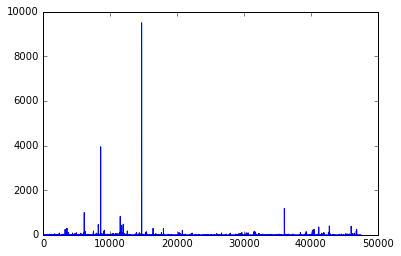

In [226]:
plt.plot(helpers_df.retweet_num)

In [251]:
from nltk import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
import re
import time
import progressbar
import pandas as pd
import json


In [241]:
list_helpers = []
for l in helpers_df.text:
    list_helpers.append(str(l))

In [310]:
cleaned_helpers = clean_tweets(list_helpers)
cvec = CountVectorizer(stop_words=my_stop_words.union(helpers_uni), min_df=.025, max_df=.1, ngram_range=(1,1))
#cvec
cvec.fit(cleaned_helpers)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.1, max_features=None, min_df=0.025,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'alone', 'empty', 'ten', 'who', 'do', 'nine', 'herself', 'if', 'either', 'phone', 'couldnt', 'find', 'amongst', 'in', 'less', 'already', 'becomes', 'part', 'than', 'formerly', 'twelve', 'forty', 'onto', 'deadly', 'until', 'cry', 'money', 'might', 'often', 'done', 'valley', 'hun...st', 'over', 'just', 'never', 'any', 'this', 'beforehand', 'latter', 'for', 'everything', 'should'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [311]:
my_stop_words.union(helpers_uni)

frozenset({'&amp',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'aid',
           'air',
           'all',
           'allowed',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'amp',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'area',
           'around',
           'as',
           'assist',
           'at',
           'avail',
           'awaits',
           'back',
           'bay',
           'be',
           'became',
           'because',
           'become',
           'become

In [312]:
bag_of_words = cvec.fit_transform( cleaned_helpers )
features = cvec.get_feature_names()

In [313]:
transformer = TfidfTransformer(norm = None,
                               sublinear_tf = True)

In [314]:
%%time
tfidf = transformer.fit_transform(bag_of_words)

Wall time: 3 ms


In [315]:
from collections import OrderedDict
np_bag_of_words = tfidf.toarray()
word_count = np.sum(tfidf,axis=0)
np_word_count = np.asarray(word_count).ravel()
dict_word_counts = dict( zip(features, np_word_count) )
orddict_word_counts = OrderedDict( 
                                sorted(dict_word_counts.items(), key=lambda x: x[1], reverse=True), )
orddict_word_counts # helpful

OrderedDict([('home', 1935.5102456679233),
             ('safe', 1572.571658679514),
             ('disaster', 1501.0548044508),
             ('property', 1377.8072843177047),
             ('efforts', 1377.8072843177047),
             ('people', 1375.0158161157756),
             ('homes', 1336.3473785855624),
             ('stays', 1287.7828928713041),
             ('dog', 1194.1280269521533),
             ('affected', 1192.5713238590949),
             ('bodies', 1188.9787541385783),
             ('destroys', 1163.7218130724934),
             ('goats', 1138.2704055886311)])

In [316]:
def create_topics(tfidf, features, N_TOPICS=5, N_TOP_WORDS=5):
    """
    Given a matrix of features of text data generate topics
    
    Parameters
    -----------
    tfidf: scipy sparse matrix
        sparse matrix of text features
    N_TOPICS: int
        number of topics (default 10)
    N_TOP_WORDS: int
        number of top words to display in each topic (default 10)
        
    Returns
    -------
    ls_keywords: ls
        list of keywords for each topics
    doctopic: array
        numpy array with percentages of topic that fit each category
    N_TOPICS: int
        number of assumed topics
    N_TOP_WORDS: int
        Number of top words in a given topic. 
    """
    
    with progressbar.ProgressBar(max_value=progressbar.UnknownLength) as bar:
        i=0
        lda = LatentDirichletAllocation( n_topics= N_TOPICS,
                                       learning_method='online') #create an object that will create 5 topics
        bar.update(i)
        i+=1
        doctopic = lda.fit_transform( tfidf )
        bar.update(i)
        i+=1
        
        ls_keywords = []
        for i,topic in enumerate(lda.components_):
            word_idx = np.argsort(topic)[::-1][:N_TOP_WORDS]
            keywords = ', '.join( features[i] for i in word_idx)
            ls_keywords.append(keywords)
            print(i, keywords)
            bar.update(i)
            i+=1
            
    return ls_keywords, doctopic,lda

In [317]:
ls_keywords, doctopic,lda = create_topics(tfidf,features)

| 4 Elapsed Time: 0:00:07                                                      


0 disaster, people, property, stays, homes
1 home, safe, bodies, people, affected
2 property, stays, efforts, destroys, goats
3 affected, safe, people, efforts, homes
4 homes, dog, bodies, goats, property


In [335]:
for l in list_helpers:
    if l.find('Dog stays behind') !=-1: #and l.find('goat') !=-1:
        print(l)
    '''if l.find('homes') != -1:
        print(l)'''

Dog stays behind with familyâ€™s goats as California wildfire destroys property http://www. foxnews.com/us/2017/10/15/ dog-stays-behind-with-familys-goats-as-california-wildfire-destroys-property.html â€¦ The ultimate loyalty of man's best fnd
Dog stays behind with family's goats as California wildfire destroys property via the @FoxNews App http://www. foxnews.com/us/2017/10/15/ dog-stays-behind-with-familys-goats-as-california-wildfire-destroys-property.html â€¦
Dog stays behind with family's goats as California wildfire destroys propert http://www. foxnews.com/us/2017/10/15/ dog-stays-behind-with-familys-goats-as-california-wildfire-destroys-property.html â€¦
Dog stays behind with family's goats as California wildfire destroys property http:// dlvr.it/Pvlxww
Dog stays behind with family's goats as California wildfire destroys property via the @FoxNews App http://www. foxnews.com/us/2017/10/15/ dog-stays-behind-with-familys-goats-as-california-wildfire-destroys-property.html â€¦
I lov

In [ ]:
if l.find('disaster') != -1:
        print(l)